<a href="https://colab.research.google.com/github/shubhaan06/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ✅ Step 1: Install & Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import uniform
import os

In [2]:

# ✅ Step 2: Download Dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
dataset_path = "UCI_HAR_Dataset"

if not os.path.exists(dataset_path):
    import zipfile, urllib.request
    urllib.request.urlretrieve(url, "UCI_HAR_Dataset.zip")
    with zipfile.ZipFile("UCI_HAR_Dataset.zip", 'r') as zip_ref:
        zip_ref.extractall(dataset_path)



In [3]:
# ✅ Step 3: Load Data
X_train = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/train/y_train.txt", header=None).values.ravel()
X_test = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/test/y_test.txt", header=None).values.ravel()

X = pd.concat([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)


<ipython-input-3-a863017546d9>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-3-a863017546d9>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(f"{dataset_path}/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)


In [4]:
# ✅ Step 4: Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# ✅ Step 5: Run Optimization for 10 Splits
results = []
convergence_data = []
best_overall_acc = 0

for i in range(10):
    print(f"\nSample {i+1}")
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.3, random_state=i)

    best_accuracy = 0
    best_params = {}
    iteration_acc = []

    param_dist = {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.001, 0.1),
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }

    sampler = list(ParameterSampler(param_dist, n_iter=100, random_state=0))

    for idx, params in enumerate(sampler):
        clf = SVC(**params)
        clf.fit(X_tr, y_tr)
        acc = accuracy_score(y_val, clf.predict(X_val))
        iteration_acc.append(acc)

        if acc > best_accuracy:
            best_accuracy = acc
            best_params = params

    results.append({
        'Sample': f'S{i+1}',
        'Accuracy': best_accuracy,
        'Params': best_params
    })

    if best_accuracy > best_overall_acc:
        best_overall_acc = best_accuracy
        convergence_data = iteration_acc


Sample 1

Sample 2

Sample 3

Sample 4

Sample 5

Sample 6

Sample 7

Sample 8

Sample 9

Sample 10


In [6]:
# ✅ Step 6: Save Results to CSV
df_results = pd.DataFrame(results)
df_results.to_csv("svm_optimization_results.csv", index=False)
df_results

,Sample,Accuracy,Params
0,S1,0.987702,"{'C': 1.1286335869343822, 'gamma': 0.010237388..."
1,S2,0.984142,"{'C': 6.558941130666561, 'gamma': 0.0447587211..."
2,S3,0.986408,"{'C': 2.2874937373677184, 'gamma': 0.057957353..."
3,S4,0.986408,"{'C': 6.558941130666561, 'gamma': 0.0447587211..."
4,S5,0.987055,"{'C': 6.558941130666561, 'gamma': 0.0447587211..."
5,S6,0.983495,"{'C': 2.2874937373677184, 'gamma': 0.057957353..."
6,S7,0.987055,"{'C': 6.558941130666561, 'gamma': 0.0447587211..."
7,S8,0.986731,"{'C': 1.2620190961239441, 'gamma': 0.077702370..."
8,S9,0.984142,"{'C': 1.6896958364551973, 'gamma': 0.012037514..."
9,S10,0.986084,"{'C': 1.6896958364551973, 'gamma': 0.012037514..."


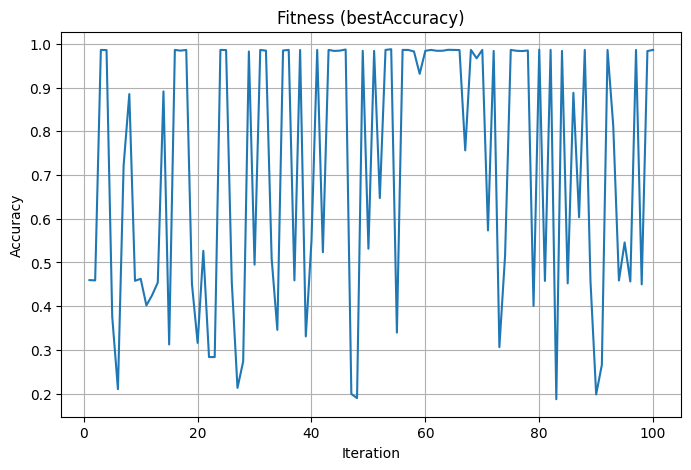

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), convergence_data)
plt.title('Fitness (bestAccuracy)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig("convergence_plot.png")
plt.show()
